# Deep Neural Networks for predicting university admissions.


## 1. Introduction
In the realm of higher education, predicting student admissions is a pivotal task for both institutions and aspiring students. It aids universities in forecasting their incoming student demographics and helps students gauge their chances of securing a place in their desired educational establishments. This assignment revolves around leveraging a dataset of students' profiles to create a predictive model for admissions into University of California, Los Angeles(UCLA) - Masters programs. We aim to use deep learning, a subfield of machine learning, to make these predictions.

Our dataset comprises several features, including the Graduate Record Examination (GRE) score, the score of the Test of English as a Foreign Language (TOEFL), university ratings, and more. While the primary continuous outcome in the dataset represents the 'chance of admit', we'll transform this into a binary classification problem. We'll classify students into two categories based on their probability of admission: those with a high chance (greater than 80%) and those with a lower chance.

To achieve this, we'll employ the power of neural networks using the TensorFlow framework. Our journey will begin with an exploration of the dataset, followed by preprocessing steps that include normalization and one-hot encoding. As a benchmark, we will establish a 'common sense' baseline, providing context for our subsequent predictive model's accuracy. The main highlight is our deep neural network model, which will be optimized for hyperparameters and trained to make accurate predictions. By the end of this notebook, we'll evaluate our model's performance on a test dataset and use visual aids to interpret and understand its predictions.


## 2. Methodology
In this project, we adopt a systematic approach to predict university admissions. Starting with the raw data, our methodology encompasses data preprocessing, model selection, hyperparameter tuning, and evaluation. Initially, we engage in data cleaning and transformation, ensuring the information is suitable for a neural network. This involves turning continuous outcomes into binary classes and one-hot encoding categorical features. Once our data is prepared, we segment it into training and test datasets to ensure a robust evaluation. We first establish a baseline model, providing a foundational performance metric to which we can compare our neural network. In the model-building phase, we harness the power of deep learning, constructing a neural network using TensorFlow. Recognizing the significance of model hyperparameters, we conduct a series of experiments, iterating over learning rates to identify the optimal configuration. After training our model, we evaluate its performance on unseen data, focusing not just on accuracy but also on understanding the types of errors it might make. Through every stage of this methodology, our goal remains consistent: to develop a highly accurate predictive model that can be reliably used in real-world university admissions scenarios.


## 3. Model Implementation
Now we are starting to work on the actual model implementation work for this task. Let's begin with loading and preprocessing the data.

## 3.1 Preprocessing

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Loading the dataset
data = pd.read_csv('university_admissions_dataset.csv')

# Displaying the first few rows of the dataset for a quick overview
print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


### 3.1.1 Data Transformation
To approach this as a binary classification problem, we transform the 'Chance of Admit' into a binary class. A threshold of 0.8 is applied, classifying students with chances above this value as having a high likelihood of admission. Further, columns that don't offer significant predictive value, such as 'Serial No.', are removed to streamline the dataset.

In [3]:
# Convert chance of admit into binary class
data['Admit'] = data['Chance of Admit '].apply(lambda x: 1 if x > 0.8 else 0)
data = data.drop(['Serial No.', 'Chance of Admit '], axis=1)

### 3.1.2 One-hot Encoding
Certain features, like 'University Rating', are categorical in nature. Representing them as one-hot encoded vectors makes them more digestible for our model. This process involves creating separate columns for each unique category and representing the presence of that category with a binary value.

In [4]:
# One-hot encode the 'University Rating' column
one_hot_data = pd.concat([data, pd.get_dummies(data['University Rating'], prefix='University Rating')], axis=1)
one_hot_data = one_hot_data.drop(columns='University Rating')

### 3.1.3 Data Splitting
To train and evaluate the model, the data is divided into training (80%) and testing (20%) sets. This allows us to train our model on a subset of the data and then test its performance on unseen data, providing an assessment of its generalization capabilities.

In [5]:
# Splitting the data into training and test datasets.
# 80% of the data is reserved for training and 20% for testing purposes.
features = one_hot_data.drop(['Admit'], axis=1)
target = one_hot_data['Admit']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### 3.1.4 Feature Normalization
For efficient training of neural networks, it's imperative that the feature values are normalized. This ensures all features are on a similar scale, which aids in faster convergence during training and can lead to improved model performance.

In [6]:
# Normalizing feature values to ensure they are on a similar scale.
# This is essential for training neural networks as it aids in faster convergence and better performance.
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

<br>

## 3.2 Modeling

### 3.2.1 Common Sense Baseline
Before we dive into complex modeling, it's crucial to establish a basic benchmark. One straightforward approach is to always predict the most frequently occurring class in our training data. This offers us a 'common sense' baseline accuracy which our deep learning model should ideally surpass to be considered useful.

In [7]:
# Common sense baseline
baseline_accuracy = max(y_train.value_counts(normalize=True))
print(f"Common Sense Baseline Accuracy: {baseline_accuracy:.4f}\n")

Common Sense Baseline Accuracy: 0.7125



### 3.2.2 Initial Neural Network Model
We commence our modeling with a simple neural network, referred to here as 'model_1'. It consists of a single hidden layer with 16 units. This 'small model' serves as an initial foray into the modeling process, allowing us to gauge how a basic model performs on our dataset.

In [8]:
# Model_1
model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_shape=(11,)))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1 = model_1.fit(X_train_normalized, y_train, validation_split=0.1, epochs=150, verbose=2)

Epoch 1/150
12/12 - 1s - loss: 0.7360 - accuracy: 0.3944 - val_loss: 0.7135 - val_accuracy: 0.4000 - 912ms/epoch - 76ms/step
Epoch 2/150
12/12 - 0s - loss: 0.6950 - accuracy: 0.4917 - val_loss: 0.6994 - val_accuracy: 0.4750 - 47ms/epoch - 4ms/step
Epoch 3/150
12/12 - 0s - loss: 0.6636 - accuracy: 0.5972 - val_loss: 0.6875 - val_accuracy: 0.5500 - 48ms/epoch - 4ms/step
Epoch 4/150
12/12 - 0s - loss: 0.6362 - accuracy: 0.6833 - val_loss: 0.6730 - val_accuracy: 0.5750 - 47ms/epoch - 4ms/step
Epoch 5/150
12/12 - 0s - loss: 0.6112 - accuracy: 0.7000 - val_loss: 0.6505 - val_accuracy: 0.5750 - 47ms/epoch - 4ms/step
Epoch 6/150
12/12 - 0s - loss: 0.5879 - accuracy: 0.7000 - val_loss: 0.6278 - val_accuracy: 0.6000 - 51ms/epoch - 4ms/step
Epoch 7/150
12/12 - 0s - loss: 0.5672 - accuracy: 0.7028 - val_loss: 0.6072 - val_accuracy: 0.6000 - 46ms/epoch - 4ms/step
Epoch 8/150
12/12 - 0s - loss: 0.5464 - accuracy: 0.7056 - val_loss: 0.5857 - val_accuracy: 0.6250 - 50ms/epoch - 4ms/step
Epoch 9/150
12

Epoch 68/150
12/12 - 0s - loss: 0.2525 - accuracy: 0.8833 - val_loss: 0.2568 - val_accuracy: 0.9250 - 54ms/epoch - 5ms/step
Epoch 69/150
12/12 - 0s - loss: 0.2510 - accuracy: 0.8861 - val_loss: 0.2583 - val_accuracy: 0.9250 - 49ms/epoch - 4ms/step
Epoch 70/150
12/12 - 0s - loss: 0.2503 - accuracy: 0.8833 - val_loss: 0.2574 - val_accuracy: 0.9250 - 44ms/epoch - 4ms/step
Epoch 71/150
12/12 - 0s - loss: 0.2486 - accuracy: 0.8889 - val_loss: 0.2597 - val_accuracy: 0.9250 - 44ms/epoch - 4ms/step
Epoch 72/150
12/12 - 0s - loss: 0.2484 - accuracy: 0.8889 - val_loss: 0.2610 - val_accuracy: 0.9250 - 46ms/epoch - 4ms/step
Epoch 73/150
12/12 - 0s - loss: 0.2475 - accuracy: 0.8917 - val_loss: 0.2598 - val_accuracy: 0.9250 - 48ms/epoch - 4ms/step
Epoch 74/150
12/12 - 0s - loss: 0.2453 - accuracy: 0.8889 - val_loss: 0.2524 - val_accuracy: 0.9250 - 48ms/epoch - 4ms/step
Epoch 75/150
12/12 - 0s - loss: 0.2445 - accuracy: 0.8833 - val_loss: 0.2517 - val_accuracy: 0.9250 - 44ms/epoch - 4ms/step
Epoch 76

Epoch 134/150
12/12 - 0s - loss: 0.2009 - accuracy: 0.9194 - val_loss: 0.2299 - val_accuracy: 0.9250 - 53ms/epoch - 4ms/step
Epoch 135/150
12/12 - 0s - loss: 0.2000 - accuracy: 0.9194 - val_loss: 0.2287 - val_accuracy: 0.9250 - 50ms/epoch - 4ms/step
Epoch 136/150
12/12 - 0s - loss: 0.1996 - accuracy: 0.9194 - val_loss: 0.2268 - val_accuracy: 0.9250 - 50ms/epoch - 4ms/step
Epoch 137/150
12/12 - 0s - loss: 0.1991 - accuracy: 0.9194 - val_loss: 0.2261 - val_accuracy: 0.9250 - 52ms/epoch - 4ms/step
Epoch 138/150
12/12 - 0s - loss: 0.1987 - accuracy: 0.9167 - val_loss: 0.2247 - val_accuracy: 0.9250 - 55ms/epoch - 5ms/step
Epoch 139/150
12/12 - 0s - loss: 0.1986 - accuracy: 0.9194 - val_loss: 0.2293 - val_accuracy: 0.9250 - 54ms/epoch - 4ms/step
Epoch 140/150
12/12 - 0s - loss: 0.1974 - accuracy: 0.9222 - val_loss: 0.2279 - val_accuracy: 0.9250 - 50ms/epoch - 4ms/step
Epoch 141/150
12/12 - 0s - loss: 0.1968 - accuracy: 0.9222 - val_loss: 0.2280 - val_accuracy: 0.9250 - 52ms/epoch - 4ms/step


### 3.2.3 Visualizing Training Progress
Training a neural network is an iterative process, and visualizing its learning progress can provide insights into its performance. By plotting the loss and accuracy over each epoch for both training and validation data, we can identify potential overfitting and assess the model's capacity.

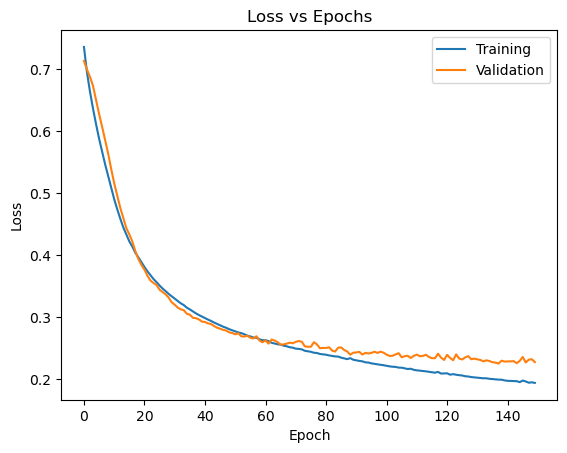

In [9]:
# Plotting loss and validation loss to visualize overfitting
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

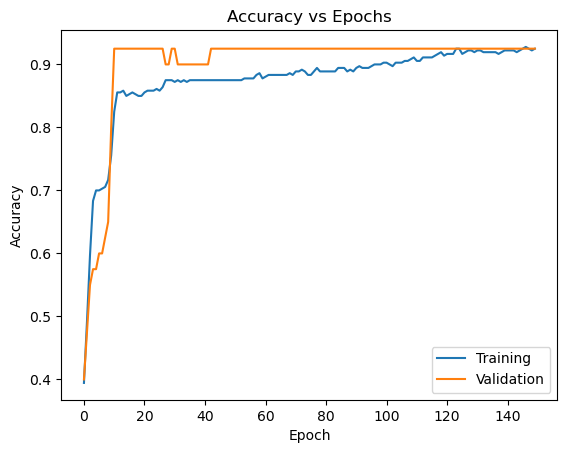

In [10]:
# Plotting training and validation accuracy to assess model performance
plt.figure()
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

### 3.3.3 Optimal Epoch Selection
To prevent overfitting and ensure efficient training, it's crucial to identify the optimal number of epochs. By monitoring the validation loss, we determine the point at which the model begins to overfit, thus providing a guideline for the total number of epochs in subsequent training.

In [11]:
# Identify optimal epochs based on validation loss 
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
optimal_epochs = np.argmin(val_loss) + 1
print(f"Optimal number of epochs (before overfitting starts): {optimal_epochs}\n")

Optimal number of epochs (before overfitting starts): 138



### 3.3.4 Hyperparameter Tuning - Learning Rate Search
One of the vital hyperparameters in training neural networks is the learning rate. It dictates the step size the model takes during optimization. We iterate over a few predefined learning rates to identify the one that provides the best validation accuracy.

In [12]:
# Searching for the best learning rate
best_val_acc = 0
best_lr = 0.001

for lr in [0.01, 0.001, 0.0001]:
    tf.keras.backend.clear_session()
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)
    
    model_2 = Sequential()
    model_2.add(Dense(256, activation='tanh', input_shape=(11,)))
    model_2.add(Dropout(0.1))
    model_2.add(Dense(128, activation='tanh'))
    model_2.add(Dropout(0.1))
    model_2.add(Dense(64, activation='tanh'))
    model_2.add(Dropout(0.1))
    model_2.add(Dense(32, activation='tanh'))
    model_2.add(Dense(1, activation='sigmoid'))
    model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
    
    history = model_2.fit(X_train_normalized, y_train, validation_split=0.1, epochs=optimal_epochs, verbose=0)
    if max(history.history['val_accuracy']) > best_val_acc:
        best_val_acc = max(history.history['val_accuracy'])
        best_lr = lr

print(f"Best learning rate from the models: {best_lr}\n")

Best learning rate from the models: 0.01



### 3.3.5 Final model training using "Optimal epochs" and "Best learning rate"
Equipped with knowledge about the optimal number of epochs and best learning rate, we train our more elaborate neural network, 'model_3'. This model has a deeper architecture with additional hidden layers and dropout layers for regularization. It's expected to provide better performance due to its increased capacity and the regularization measures in place.

In [13]:
# Training the final i.e. third model using optimal epochs and best learning rate
model_3 = Sequential()
model_3.add(Dense(256, activation='tanh', input_shape=(11,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr), metrics=['accuracy'])
model_3.fit(X_train_normalized, y_train, epochs=optimal_epochs, verbose=2)

Epoch 1/138
13/13 - 1s - loss: 0.4992 - accuracy: 0.7150 - 1s/epoch - 107ms/step
Epoch 2/138
13/13 - 0s - loss: 0.3628 - accuracy: 0.8450 - 40ms/epoch - 3ms/step
Epoch 3/138
13/13 - 0s - loss: 0.3208 - accuracy: 0.8750 - 39ms/epoch - 3ms/step
Epoch 4/138
13/13 - 0s - loss: 0.3065 - accuracy: 0.8725 - 37ms/epoch - 3ms/step
Epoch 5/138
13/13 - 0s - loss: 0.2587 - accuracy: 0.8850 - 35ms/epoch - 3ms/step
Epoch 6/138
13/13 - 0s - loss: 0.2917 - accuracy: 0.8625 - 36ms/epoch - 3ms/step
Epoch 7/138
13/13 - 0s - loss: 0.2985 - accuracy: 0.8675 - 40ms/epoch - 3ms/step
Epoch 8/138
13/13 - 0s - loss: 0.2709 - accuracy: 0.8800 - 42ms/epoch - 3ms/step
Epoch 9/138
13/13 - 0s - loss: 0.3031 - accuracy: 0.8850 - 38ms/epoch - 3ms/step
Epoch 10/138
13/13 - 0s - loss: 0.2530 - accuracy: 0.9150 - 36ms/epoch - 3ms/step
Epoch 11/138
13/13 - 0s - loss: 0.2782 - accuracy: 0.8975 - 36ms/epoch - 3ms/step
Epoch 12/138
13/13 - 0s - loss: 0.3449 - accuracy: 0.8100 - 34ms/epoch - 3ms/step
Epoch 13/138
13/13 - 0s -

13/13 - 0s - loss: 0.1882 - accuracy: 0.9200 - 34ms/epoch - 3ms/step
Epoch 102/138
13/13 - 0s - loss: 0.2009 - accuracy: 0.9025 - 36ms/epoch - 3ms/step
Epoch 103/138
13/13 - 0s - loss: 0.1912 - accuracy: 0.9050 - 32ms/epoch - 2ms/step
Epoch 104/138
13/13 - 0s - loss: 0.1956 - accuracy: 0.9175 - 33ms/epoch - 3ms/step
Epoch 105/138
13/13 - 0s - loss: 0.1917 - accuracy: 0.9175 - 36ms/epoch - 3ms/step
Epoch 106/138
13/13 - 0s - loss: 0.1716 - accuracy: 0.9300 - 32ms/epoch - 2ms/step
Epoch 107/138
13/13 - 0s - loss: 0.1746 - accuracy: 0.9275 - 36ms/epoch - 3ms/step
Epoch 108/138
13/13 - 0s - loss: 0.1694 - accuracy: 0.9275 - 34ms/epoch - 3ms/step
Epoch 109/138
13/13 - 0s - loss: 0.1780 - accuracy: 0.9000 - 35ms/epoch - 3ms/step
Epoch 110/138
13/13 - 0s - loss: 0.1902 - accuracy: 0.9025 - 35ms/epoch - 3ms/step
Epoch 111/138
13/13 - 0s - loss: 0.1603 - accuracy: 0.9225 - 38ms/epoch - 3ms/step
Epoch 112/138
13/13 - 0s - loss: 0.1677 - accuracy: 0.9275 - 34ms/epoch - 3ms/step
Epoch 113/138
13/1

<br>

## 4. Model Evaluation 
Once the final model is trained, the critical task is to assess its performance on unseen data to gauge its generalization capabilities. We achieve this by evaluating the model on our test dataset, reporting the loss and accuracy as metrics of its performance.

In [14]:
# Evaluating the final model on the test set to assess generalization
loss, accuracy = model_3.evaluate(X_test_normalized, y_test, verbose=1)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}\n")

4/4 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 0.8900

Test Loss: 0.1367
Test Accuracy: 0.8900



Upon evaluating our deep learning model on the test set, we observed a commendable performance. The model achieved a test accuracy of 89%, showcasing its capability to predict student admissions with significant accuracy. Additionally, the model returned a loss value of 0.1367. This loss value offers insight into the closeness of our model's predictions to the actual outcomes: a lower loss indicates that the predictions are more aligned with the true labels. Given this relatively low loss and the high accuracy, we can deduce that the model not only classifies with precision but also with a reasonable degree of confidence. These results underscore the effectiveness of our neural network model in the realm of predicting university admissions.

## 5. Interpretation of Results
After training our deep neural network and evaluating its performance on the test set, we delve into understanding the results more qualitatively. An essential tool for classification problems is the classification report, which provides metrics like precision, recall, and F1-score for each class. It gives insights into how well our model is doing for individual classes.

Furthermore, we visualize the results using a confusion matrix. A confusion matrix succinctly presents the number of correct and incorrect predictions made by the model. By plotting this matrix, we can visually assess how many times the model predicted admissions correctly (True Positives) and how many times it made errors, such as False Positives and False Negatives.

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        73
           1       0.94      0.63      0.76        27

    accuracy                           0.89       100
   macro avg       0.91      0.81      0.84       100
weighted avg       0.90      0.89      0.88       100



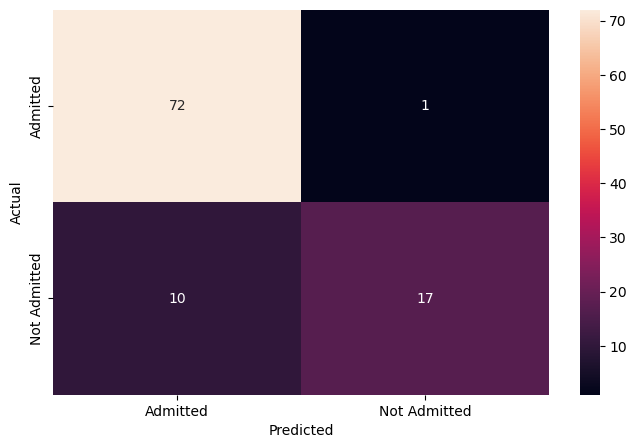

In [15]:
# Interpretation of results
test_pred = np.round(model_3.predict(X_test_normalized))
print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['Admitted', 'Not Admitted'], yticklabels=['Admitted', 'Not Admitted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Upon delving deeper into the performance metrics of our model, some key insights emerge. The overall accuracy remains steady at 89%, corroborating our model's ability to discern between students who will be admitted and those who will not. For the students who were not admitted (Class 0), the model boasts a precision of 0.88, indicating that 88% of the predicted "Not Admitted" cases were accurate. Moreover, a remarkable recall of 0.99 reveals that the model successfully identified 99% of all the actual "Not Admitted" cases.

On the flip side, for students who were admitted (Class 1), the precision is an impressive 0.94, suggesting that 94% of the predicted "Admitted" students genuinely got admitted. However, the recall dips to 0.63, meaning the model captured only 63% of the actual admitted students. While the F1-scores convey a balanced view of precision and recall, it's evident that the model's prowess lies in identifying the non-admitted students, but there is room for improvement when predicting admitted students.

<br>

## 6. Conclusion

Throughout this study, our primary goal was to harness the capabilities of deep learning to accurately predict the likelihood of student admissions into UCLA based on a range of criteria. Our journey began with the Common Sense Baseline, which assumed that the class with the highest frequency in the training data would be the prediction for all samples. This simple method achieved an accuracy of 71.25%, serving as our foundational benchmark.

However, with the aim of surpassing this baseline, we dived into the complex world of neural networks. By experimenting with various architectures, hyperparameters, and training techniques, we found that our model achieved optimal performance at 138 epochs with a learning rate of 0.01. The resulting deep learning model outperformed the baseline with a commendable test accuracy of 89.00%. The precision, recall, and f1-scores further validated the robustness of our model. Especially notable is the model's precision of 94% in predicting students with a high chance of admission, though its recall for this category indicates there's room for improvement in capturing all potential admits.

In comparison to the baseline accuracy, our model demonstrated a significant improvement of nearly 18 percentage points. This underscores the power and adaptability of deep neural networks in tackling such classification tasks, even when compared to simplistic approaches.

In summary, while the common sense baseline provided a rudimentary gauge of student admissions, our deep learning model offered a more nuanced, accurate, and insightful prediction. This not only showcases the prowess of modern machine learning techniques but also paves the way for their application in other similar educational datasets, where institutions aim to make data-driven decisions regarding their potential students.